Script to create noisy arteficial data 

In [38]:
# import libaries 
import numpy as np
import torch
from scipy.integrate import odeint

In [39]:
def equation(y, t):
    #the equation is A <-> B+C and C<->D
    cA,cB,cC,cD=y  #array of concentrations
   

    k1 = 1    # kinetic constants of the chemical reactions
    k2 = 0.5
    k3 = 3
    k4 = 2


    dA_dt = - k1 * cA + k2 * cB * cC                             #dA/dt
    dB_dt = + k1 * cA - k2 * cB * cC                             #dB/dt
    dC_dt = + k1 * cA - k2 * cB * cC - k3 * cC + k4 * cD         #dC/dt
    dD_dt = + k3 * cC - k4 * cD                                  #dD/dt

    return [dA_dt, dB_dt, dC_dt, dD_dt]



In [40]:
y0 = [1., 0., 0., 0.] #initial concentrations
t = np.linspace(0, 10, 101)         #time
Conc= odeint(equation, y0,t)

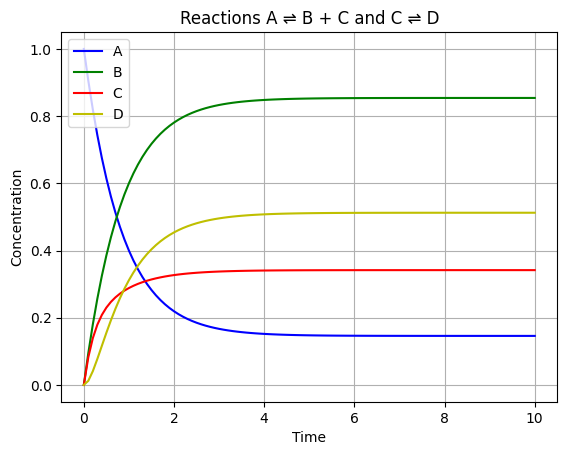

In [41]:
import matplotlib.pyplot as plt
plt.plot(t, Conc[:, 0], 'b', label='A')
plt.plot(t, Conc[:, 1], 'g', label='B')
plt.plot(t, Conc[:, 2], 'r', label='C')
plt.plot(t, Conc[:, 3], 'y', label='D')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Reactions A ⇌ B + C and C ⇌ D')
plt.grid()
plt.show()

In [42]:
#Add noise
noise_std=0.01
num_points=(101,4)
Conc_noise = Conc + np.random.normal(0, noise_std,num_points)



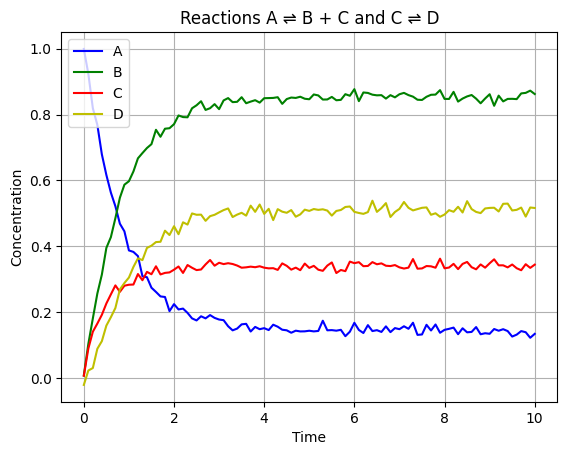

In [43]:
plt.plot(t, Conc_noise[:, 0], 'b', label='A')
plt.plot(t, Conc_noise[:, 1], 'g', label='B')
plt.plot(t, Conc_noise[:, 2], 'r', label='C')
plt.plot(t, Conc_noise[:, 3], 'y', label='D')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Reactions A ⇌ B + C and C ⇌ D')
plt.grid()
plt.show()

In [44]:
# save as csv file
import pandas as pd
df=pd.DataFrame
df_final=df({'time': t, 'ConcA': Conc_noise[:, 0], 'ConcB': Conc_noise[:, 1], 'ConcC': Conc_noise[:, 2], 'ConcD': Conc_noise[:, 3]} )
print (df_final)

output_file = "/workspaces/bio-pinn/Arteficial Data/Data_noisy.csv"
df_final.to_csv(output_file, index=False)

print(f"Daten erfolgreich erweitert und in {output_file} gespeichert.")

     time     ConcA     ConcB     ConcC     ConcD
0     0.0  0.999271  0.007767  0.006653 -0.021096
1     0.1  0.923688  0.103277  0.089222  0.022587
2     0.2  0.819228  0.180845  0.140493  0.030172
3     0.3  0.768460  0.256496  0.165251  0.088740
4     0.4  0.679087  0.313991  0.191811  0.111818
..    ...       ...       ...       ...       ...
96    9.6  0.131623  0.846857  0.333304  0.510606
97    9.7  0.142404  0.864158  0.327191  0.517452
98    9.8  0.138910  0.865797  0.345474  0.490065
99    9.9  0.122091  0.872590  0.334365  0.517707
100  10.0  0.133917  0.862295  0.344170  0.516223

[101 rows x 5 columns]
Daten erfolgreich erweitert und in /workspaces/bio-pinn/Arteficial Data/Data_noisy.csv gespeichert.
